___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# K Nearest Neighbors Project (knn)



In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np

In [18]:
df_knn= pd.read_csv("KNN_Project_Data")

In [19]:
df_knn.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


**Use seaborn on the dataframe to create a pairplot with the hue indicated by the TARGET CLASS column.**

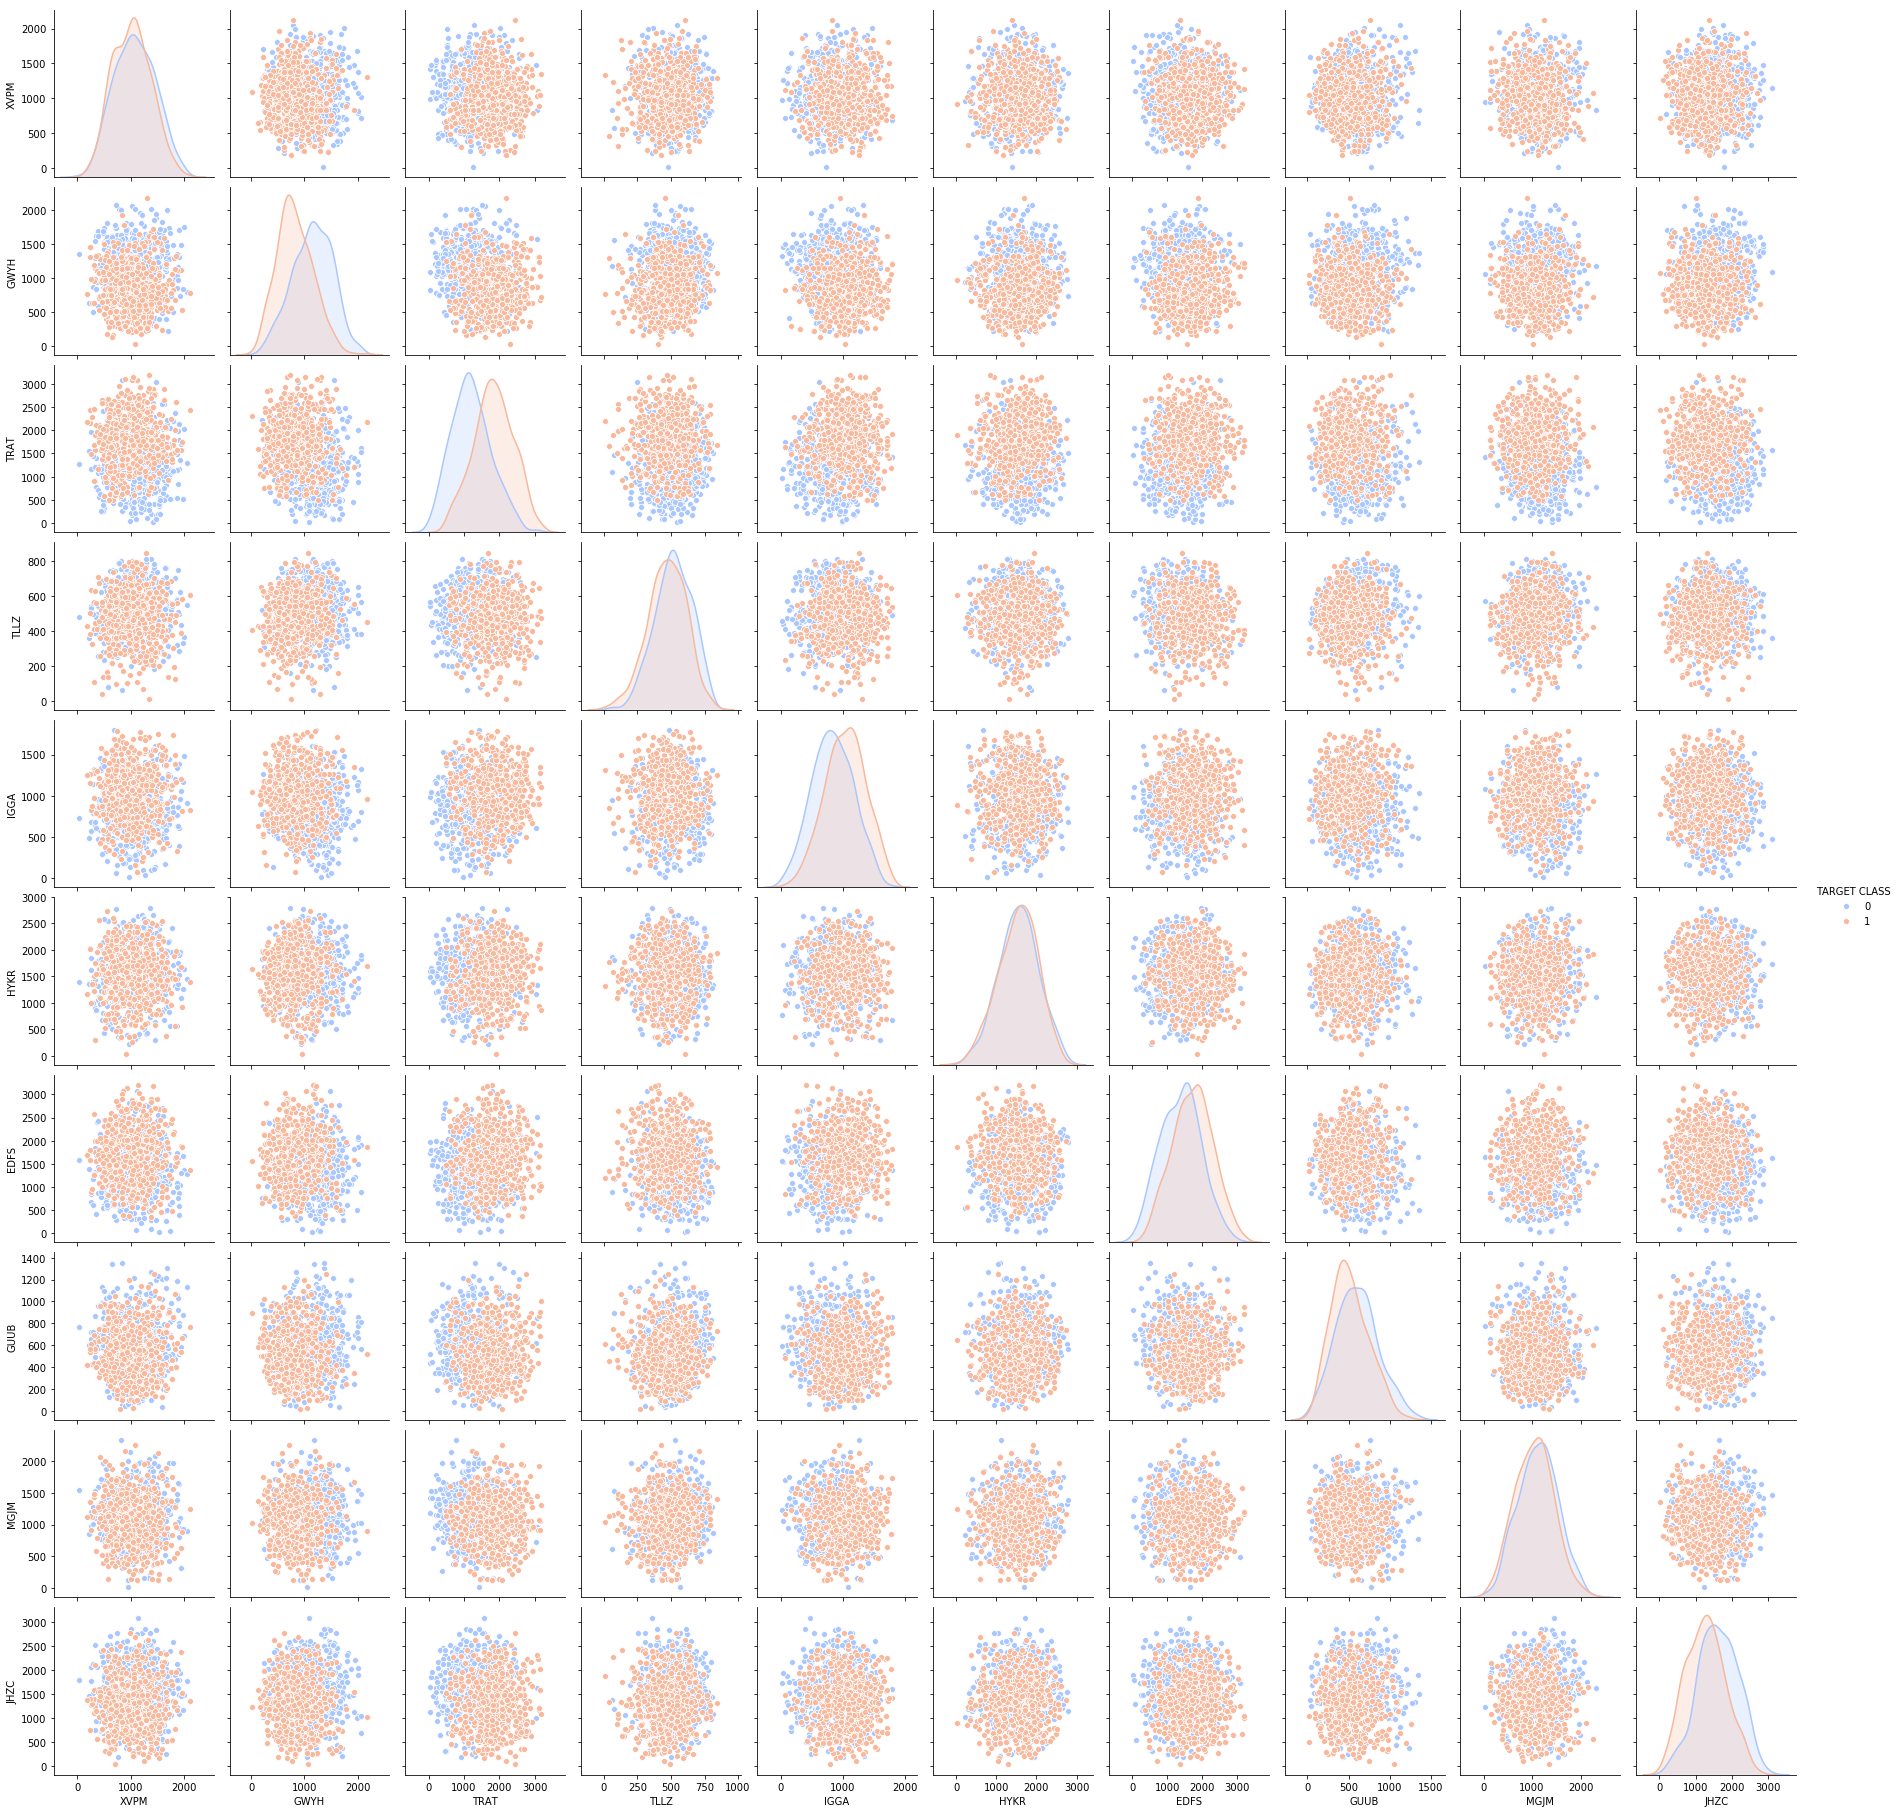

In [20]:
sns.pairplot(data= df_knn,hue="TARGET CLASS",palette="coolwarm")

# Standardize the Variables

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
scaler=StandardScaler()

** Fit scaler to the features.**

In [23]:
scaler.fit(df_knn.drop("TARGET CLASS",axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [24]:
scaled_features=scaler.transform(df_knn.drop("TARGET CLASS",axis=1))

**Convert the scaled features**

In [27]:
df_converts= pd.DataFrame(scaled_features,columns= df_knn.columns[:-1])

In [28]:
df_converts.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762


# Train Test Split

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
 X_train, X_test, y_train, y_test = train_test_split(scaled_features, df_knn["TARGET CLASS"], test_size=0.30, random_state=101)

# Using KNN

In [31]:
from sklearn.neighbors import KNeighborsClassifier

**Create a KNN model instance with n_neighbors=1.use 1 at first**

In [32]:
knnModel=KNeighborsClassifier(n_neighbors=1)

In [33]:
knnModel.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

# Predictions and Evaluations

In [34]:
predictions=knnModel.predict(X_test)

** Create a confusion matrix and classification report.**

In [36]:
from sklearn.metrics import classification_report,confusion_matrix

In [38]:
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.73      0.72      0.72       152
           1       0.71      0.72      0.72       148

   micro avg       0.72      0.72      0.72       300
   macro avg       0.72      0.72      0.72       300
weighted avg       0.72      0.72      0.72       300

[[109  43]
 [ 41 107]]


# Choosing a K Value

** Create a for loop that trains various KNN models with different k values, then keep track of the error_rate for each of these models with a list.**

In [41]:
best_knn=[]
for i in range(1,40):
    knn= KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    best_knn.append(np.mean(pred_i != y_test))

**create the plot using the information from my for loop.**

Text(0, 0.5, 'Error Rate')

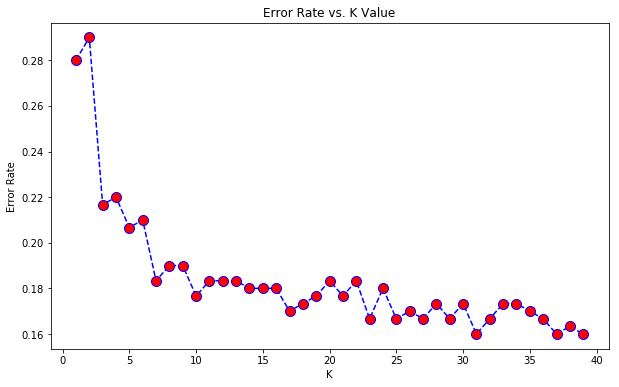

In [42]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),best_knn,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

## Retrain with new K Value

**Retrain my model with the best K value (up to my to decide what i want) and re-do the classification report and the confusion matrix.**

In [43]:
knnModel=KNeighborsClassifier(n_neighbors=30)
knnModel.fit(X_train,y_train)
predictions=knnModel.predict(X_test)
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83       152
           1       0.82      0.84      0.83       148

   micro avg       0.83      0.83      0.83       300
   macro avg       0.83      0.83      0.83       300
weighted avg       0.83      0.83      0.83       300

[[124  28]
 [ 24 124]]
